In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data/All_data.csv')
df = df.drop(columns=['PLAYER_ID','RANK','TEAM_ID','TEAM'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PLAYER    4330 non-null   object 
 1   GP        4330 non-null   int64  
 2   MIN       4330 non-null   float64
 3   FGM       4330 non-null   float64
 4   FGA       4330 non-null   float64
 5   FG_PCT    4330 non-null   float64
 6   FG3M      4330 non-null   float64
 7   FG3A      4330 non-null   float64
 8   FG3_PCT   4330 non-null   float64
 9   FTM       4330 non-null   float64
 10  FTA       4330 non-null   float64
 11  FT_PCT    4330 non-null   float64
 12  OREB      4330 non-null   float64
 13  DREB      4330 non-null   float64
 14  REB       4330 non-null   float64
 15  AST       4330 non-null   float64
 16  STL       4330 non-null   float64
 17  BLK       4330 non-null   float64
 18  TOV       4330 non-null   float64
 19  PTS       4330 non-null   float64
 20  EFF       4330 non-null   floa

In [3]:
df.head(20)

,PLAYER,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,YEAR,ALL_STAR
0,Tracy McGrady,75,39.4,11.1,24.2,0.457,2.3,6.0,0.386,7.7,...,4.9,6.5,5.5,1.7,0.8,2.6,32.1,28.8,2002,1.0
1,Kobe Bryant,82,41.5,10.6,23.5,0.451,1.5,4.0,0.383,7.3,...,5.6,6.9,5.9,2.2,0.8,3.5,30.0,28.0,2002,1.0
2,Allen Iverson,82,42.5,9.8,23.7,0.414,1.0,3.7,0.277,7.0,...,3.4,4.2,5.5,2.7,0.2,3.5,27.6,20.9,2002,1.0
3,Shaquille O'Neal,67,37.8,10.4,18.1,0.574,0.0,0.0,0.000,6.7,...,7.2,11.1,3.1,0.6,2.4,2.9,27.5,29.9,2002,1.0
4,Paul Pierce,79,39.2,8.4,20.2,0.416,1.5,4.9,0.302,7.6,...,6.0,7.3,4.4,1.8,0.8,3.6,25.9,22.9,2002,1.0
5,Dirk Nowitzki,80,39.0,8.6,18.6,0.463,1.9,4.9,0.379,6.0,...,8.9,9.9,3.0,1.4,1.0,1.9,25.1,27.7,2002,1.0
6,Tim Duncan,81,39.3,8.8,17.2,0.513,0.1,0.3,0.273,5.6,...,9.7,12.9,3.9,0.7,2.9,3.1,23.3,29.9,2002,1.0
7,Chris Webber,67,39.1,9.9,21.4,0.461,0.1,0.3,0.238,3.2,...,8.1,10.5,5.4,1.6,1.3,3.2,23.0,25.0,2002,0.0
8,Kevin Garnett,82,40.5,9.1,18.1,0.502,0.2,0.9,0.282,4.6,...,10.5,13.4,6.0,1.4,1.6,2.8,23.0,32.1,2002,1.0
9,Ray Allen,76,37.9,7.9,17.9,0.439,2.6,7.0,0.377,4.2,...,3.8,5.0,4.4,1.4,0.2,2.6,22.5,20.4,2002,0.0


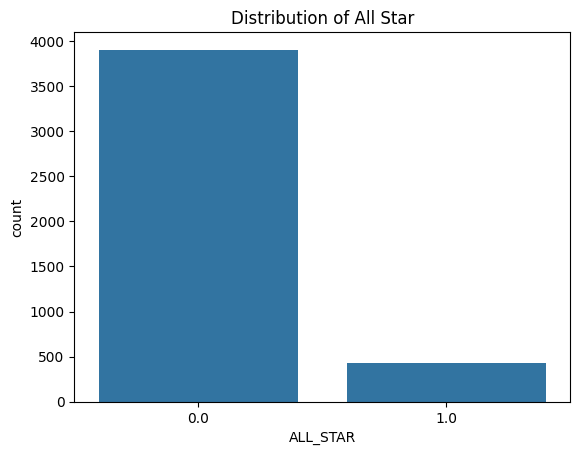

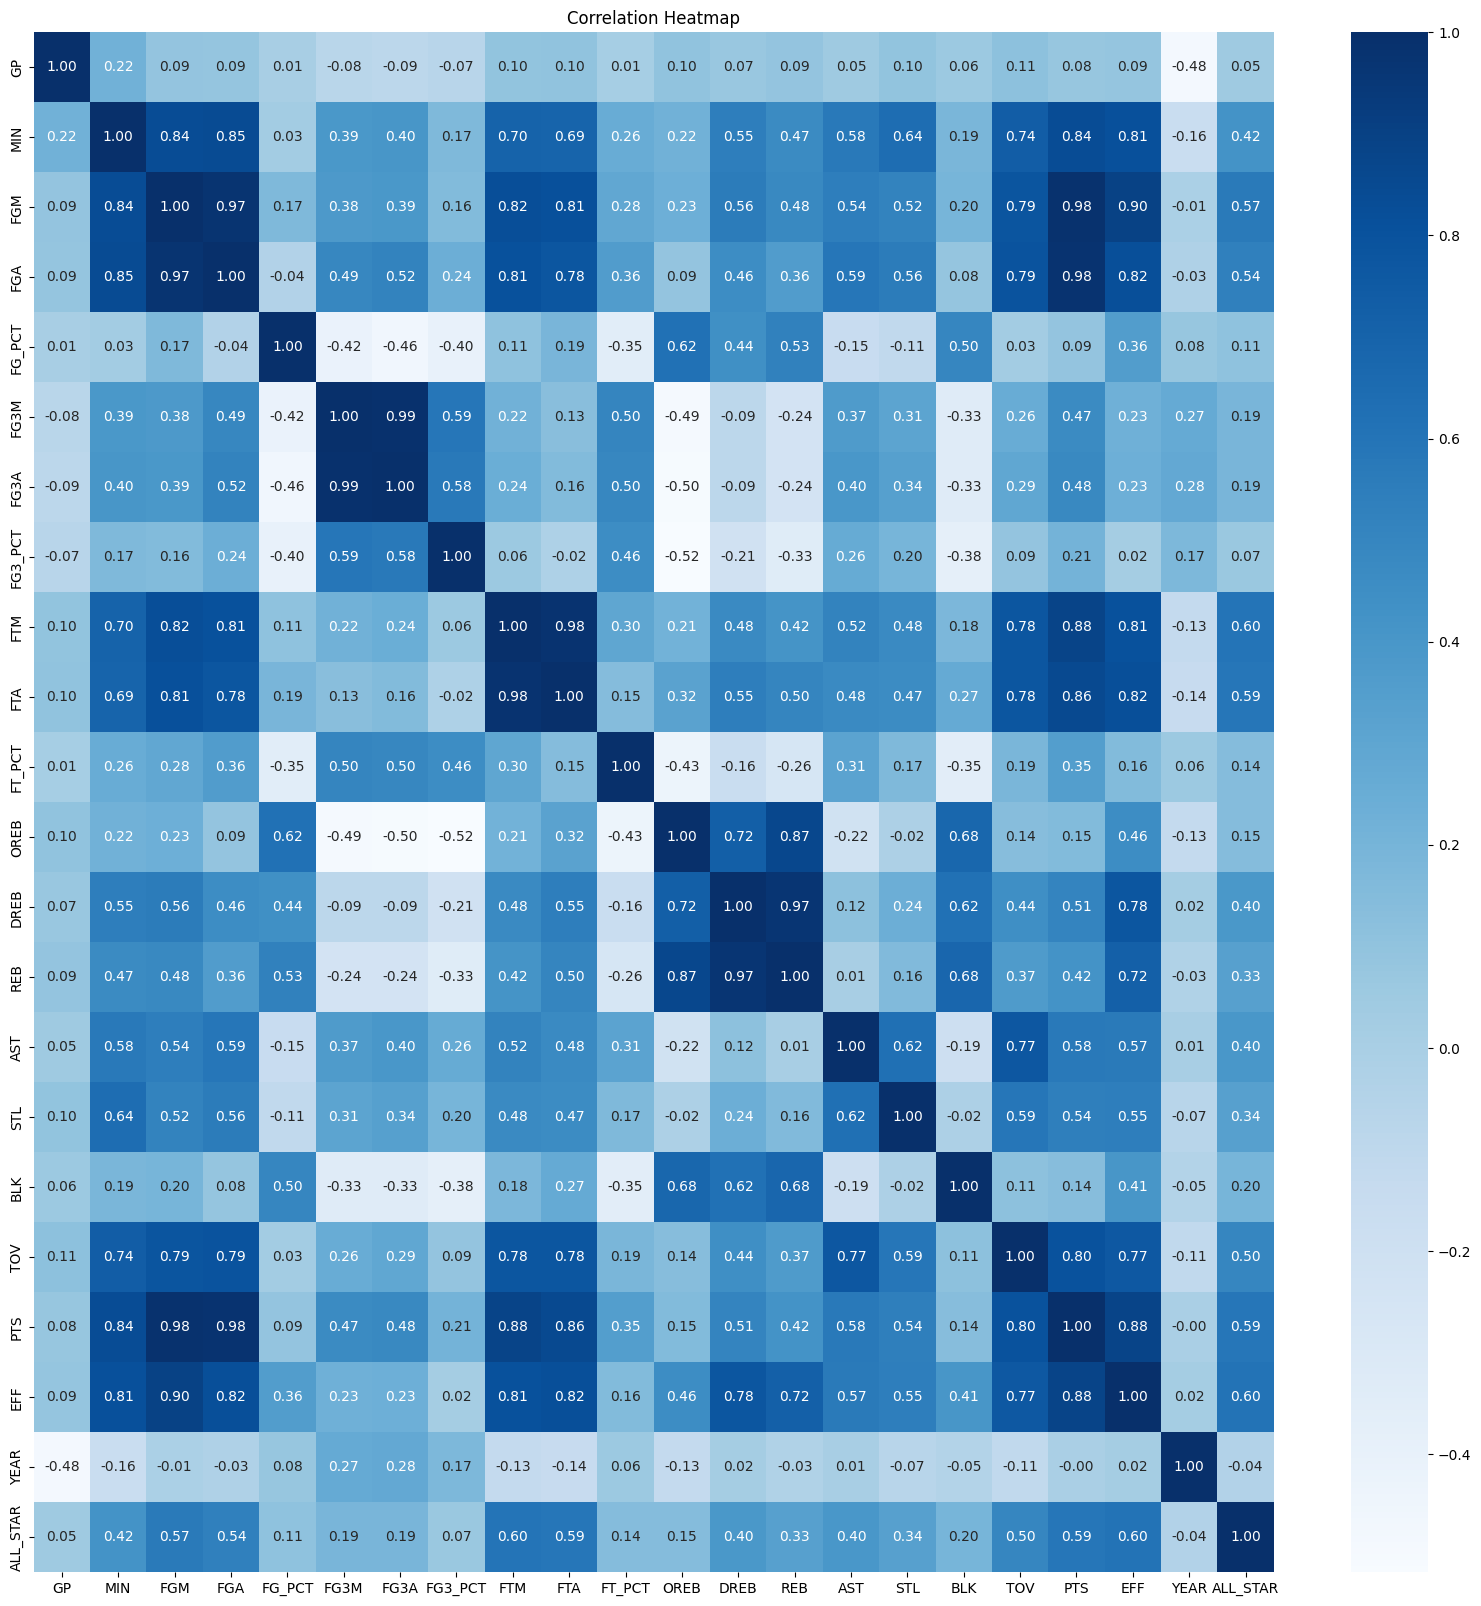

In [4]:
sns.countplot(x='ALL_STAR', data=df)
plt.title('Distribution of All Star')
plt.show()

# Correlation heatmap (only for numeric features)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Feature scaling
y = df['ALL_STAR']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
X = df.drop(['PLAYER','ALL_STAR'], axis=1)

In [6]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [7]:
model = RandomForestClassifier(random_state=42,n_estimators=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       788
         1.0       0.72      0.55      0.62        78

    accuracy                           0.94       866
   macro avg       0.84      0.76      0.80       866
weighted avg       0.93      0.94      0.94       866

Confusion Matrix:


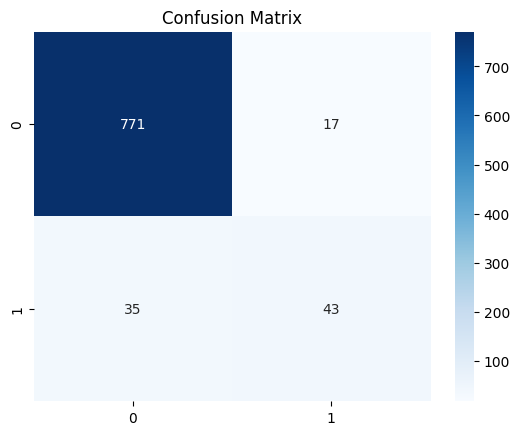

In [8]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

         importance
EFF        0.159771
PTS        0.117354
FGM        0.100214
FTM        0.079705
FGA        0.065855
FTA        0.062730
MIN        0.043632
AST        0.040100
DREB       0.037398
TOV        0.033017
REB        0.032713
FT_PCT     0.030486
FG_PCT     0.028579
FG3_PCT    0.024002
BLK        0.022323
OREB       0.021960
FG3A       0.021227
STL        0.020991
GP         0.020895
YEAR       0.018921
FG3M       0.018126


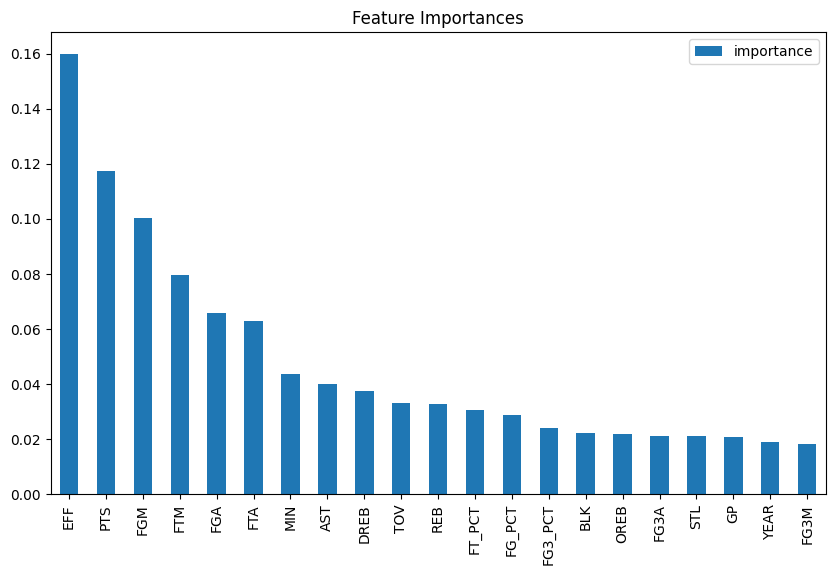

In [9]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Plot feature importance
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()